This notebook performs the Softmax Regression, also known as Multinomial Logistic Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import sklearn.metrics as metrics
import sklearn.datasets as sk_datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [2]:
#-----------------------------------
#   Softmax Classify Methods
#-----------------------------------

def classify_softmax(theta,X):
	X = np.insert(X,0,1,axis=1)
	h = softmax(theta,X)
	pred = np.argmax(h,axis=0)
	X = np.delete(X,0,axis=1)
	return pred

In [3]:
#-----------------------------------
#   Softmax Training Methods
#-----------------------------------

def softmax(theta,X):
	score = np.dot(theta,X.transpose())
	exp = np.exp(score)
	h = exp / np.sum(exp,axis=0)
	return h

def cost(theta,X,y):
	nsamples = X.shape[0]
	h = softmax(theta,X)
	lnh = np.log(h)
	ylnh = np.sum((np.multiply(lnh,y)),axis=0)
	error = np.sum(ylnh)/-nsamples
	return error

In [10]:
#-----------------------------------
#   Evaluation Metrics and Loss Functions
#-----------------------------------

def accuracy_score(Y,predY,mode='binary'):
	acc = 0.0
	if (mode=='binary'):
		TP = ((predY == Y) & (predY == 1.)).sum()
		TN = ((predY == Y) & (predY == 0.)).sum()	
		acc = (TP + TN) / Y.shape[0]
	elif (mode=='multi'):
		TP = (predY == Y).sum()
		acc = TP / Y.shape[0]
	return acc

def precision_score(Y,predY,mode='binary'):
	precision = 0.0
	if (mode=='binary'):
		TP = ((predY == Y) & (predY == 1)).sum()
		FP = ((predY != Y) & (predY == 1)).sum()
		precision = TP / (TP + FP)
	elif (mode=='multi'):
		classes=np.unique(Y)
		for c in classes:
			TP = ((predY == Y) & (predY == c)).sum()
			FP = ((predY != Y) & (predY == c)).sum()
			precision += TP / (TP + FP)
		precision /= len(classes)
	return precision

def recall_score(Y,predY,mode='binary'):
	recall = 0.0
	if (mode=='binary'):
		TP = ((predY == Y) & (predY == 1)).sum()
		FN = ((predY != Y) & (predY == 0)).sum()
		recall = TP / (TP + FN)
	elif (mode=='multi'):
		classes=np.unique(Y)
		for c in classes:
			TP = ((predY == Y) & (predY == c)).sum()
			FN = ((predY != Y) & (Y == c)).sum()
			recall += TP / (TP + FN)
		recall /= len(classes)
	return recall

def fb_score(Y,predY,beta,mode='binary'):
	fbscore = 0.0
	if (mode=='binary'):
		precision = precision_score(predY,Y)
		recall = recall_score(predY,Y)
		fscore = (1 + beta*beta)*((precision*recall)/((beta*beta*precision)+recall))
	elif (mode=='multi'):
		precision = precision_score(predY,Y,'multi')
		recall = recall_score(predY,Y,'multi')
		fscore = (1 + beta*beta)*((precision*recall)/((beta*beta*precision)+recall))
	return fscore

In [11]:
def BGD(X,y,alpha,iterations):

	X = np.insert(X,0,1,axis=1)

    # One-hot enconding the target class vector
	lb = LabelBinarizer()
	lb.fit(y_train)
	y_enc = (lb.transform(y_train)).transpose()

	nsamples = X.shape[0]
	nfeatures = X.shape[1]
	theta = np.zeros([len(np.unique(y)),nfeatures])	
	J=[]

	for i in range(iterations):

		h = softmax(theta,X)

		error = h - y_enc

		grad = (np.matmul(error,X))/nsamples

		theta = theta - (alpha*grad)

		J.append(cost(theta,X,y_enc))	

	X = np.delete(X,0,axis=1)

	plt.plot(J)	
	plt.ylabel('Error')
	plt.xlabel('iterations')
	plt.show()

	return theta,J[iterations-1]

[[ 0.08329434 -0.44330944  1.44817596 ...  1.4076893   1.32558192
   1.25244913]
 [ 1.29873359  1.59257095  1.00537302 ... -0.25772939  0.76925275
   0.05502757]
 [-0.11205029  0.77839973 -0.29288213 ...  0.09906628 -0.70838385
  -1.58585041]
 ...
 [-0.36962988  0.27884389 -1.65837845 ...  0.28683161  0.09776532
   1.43331174]
 [-1.4393348   0.53613978 -1.6476861  ...  0.33115653  1.37861287
   0.07260087]
 [ 0.24956221  1.20190319  0.32450274 ... -0.54170166 -1.87274765
  -1.52167108]]
[3 0 0 0 0 3 3 2 0 0 2 1 1 1 2 0 0 2 1 3 1 1 0 0 2 0 1 1 1 0 1 1 3 0 2 1 2
 2 2 2 0 1 2 2 3 0 0 2 1 3 1 0 3 1 2 2 2 1 3 0 2 3 2 3 1 3 1 3 0 0 0 3 3 2
 1 3 0 3 1 3 1 0 2 0 3 3 2 3 2 3 2 3 2 2 3 0 3 1 0 1 3 1 0 2 0 2 3 1 3 3 0
 1 3 2 3 2 0 0 0 0 3 1 1 3 1 1 2 1 0 2 3 0 2 3 1 1 2 2 1 1 0 0 2 2 2 0 3 0
 0 0 2 3 1 0 2 3 0 1 1 2 1 3 2 1 0 2 1 1 1 3 0 2 2 0 3 0 1 2 0 2 0 0 2 3 1
 3 0 0 3 3 2 2 3 2 2 3 3 1 0 3 1 2 1 1 2 3 3 0 0 1 0 0 0 1 3 2 0 1 2 1 0 2
 0 1 2 1 2 0 3 2 0 3 3 1 0 2 0 3 3 3 2 1 3 1 2 3 1 1 3 2 2

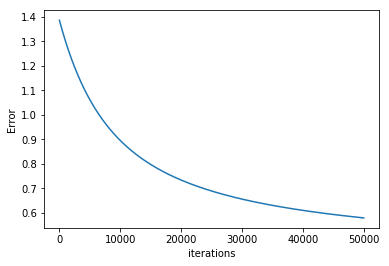


--- Classification
[1 1 2 3 2 2 2 3 1 1 3 0 2 2 1 1 2 1 3 0 1 1 3 2 0 1 0 0 0 3 0 1 1 2 3 3 3
 0 3 0 1 2 3 1 0 0 2 0 3 1 3 0 0 2 2 1 2 0 3 1 1 0 1 0 0 0 0 2 3 0 3 0 0 3
 2 2 3 3 3 0 0 2 3 1 2 1 1 0 0 1 0 1 3 2 3 1 1 0 3 3]

--- Expected Output
[1 2 2 0 2 2 2 3 1 1 3 3 0 3 1 1 2 1 3 1 1 2 3 2 0 0 2 0 0 1 2 0 1 2 3 3 3
 0 0 1 1 1 3 1 1 0 2 0 3 1 3 2 0 2 2 1 2 0 3 0 1 0 1 0 0 2 0 1 1 0 3 0 0 3
 2 2 3 3 3 0 0 1 3 1 2 1 1 2 0 1 1 1 3 2 3 1 1 1 3 3]

myAccuracy:  0.75
skAccuracy:  0.75

myPrecision:  0.7545954907161804
skPrecision:  0.75

myRecall:  0.7555702537294402
skRecall:  0.75

myF1Score:  0.7550825576338536
skF1Score:  0.75


In [12]:
#-----------------------------------
# MultiClass Classification By Softmax
#-----------------------------------

# Toy example
X,y = sk_datasets.make_classification(n_samples = 500, n_features = 20, n_classes = 4, n_clusters_per_class=1, n_informative=4,
										n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train)
print(y_train)

theta,acc = BGD(X_train,y_train,0.0001,50000)

predY = classify_softmax(theta,X_test)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_test)

acc = accuracy_score(y_test,predY,mode='multi')
sk_acc = metrics.accuracy_score(y_test,predY)
pre = precision_score(y_test,predY,mode='multi')
sk_pre = metrics.precision_score(y_test,predY,average='micro')
recall = recall_score(y_test,predY,mode='multi')
sk_recall = metrics.recall_score(y_test,predY,average='micro')
f = fb_score(y_test,predY,1,mode='multi')
sk_f = metrics.f1_score(y_test,predY,average='micro')

print()
print("myAccuracy: ", str(acc))
print("skAccuracy: ", str(sk_acc))
print()
print("myPrecision: ",str(pre))
print("skPrecision: ",str(sk_pre))
print()
print("myRecall: ",str(recall))
print("skRecall: ",str(sk_recall))
print()
print("myF1Score: ",str(f))
print("skF1Score: ",str(sk_f))